In [1]:
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

np.random.seed(42)

In [2]:
palette = sns.color_palette()

In [3]:
def dataframe_from2d(X, y):
    return pd.DataFrame(
        {
            'x1': X[:,0],
            'x2': X[:,1],
            'y': y
        }
    )

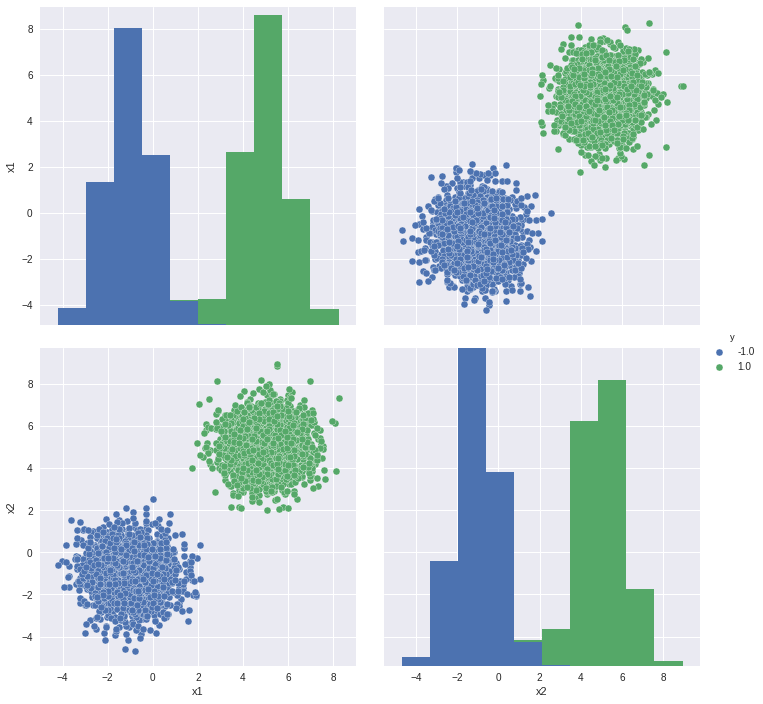

In [4]:
N = 2000
X = np.concatenate(([5, 5] + np.random.randn(N, 2), [-1, -1] + np.random.randn(N, 2)))
y = np.concatenate((np.ones(N), -np.ones(N)))
df = dataframe_from2d(X, y)
sns.pairplot(df, hue='y', size=5, palette=palette, vars=["x1", "x2"])

Manual coordinate rotation by $\frac{1}{4}\pi\,rad$.

In [5]:
alpha = -0.25 * np.pi
R = np.array(
    [
        [np.cos(alpha), -np.sin(alpha)],
        [np.sin(alpha), np.cos(alpha)]
    ]
)

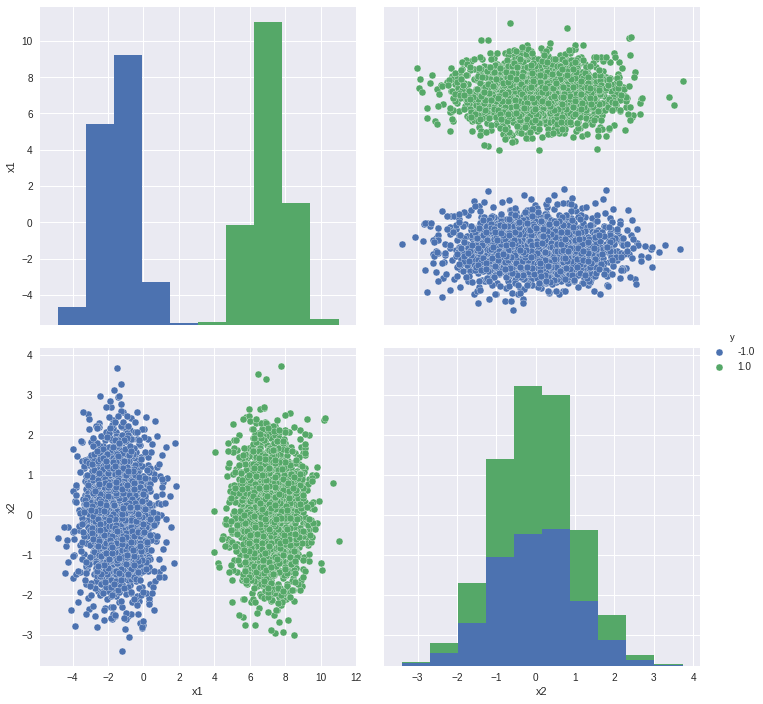

In [6]:
X_rotated = np.array([np.dot(R, x) for x in X])
df = dataframe_from2d(X_rotated, y)
sns.pairplot(df, hue='y', size=5, palette=palette, vars=["x1", "x2"])

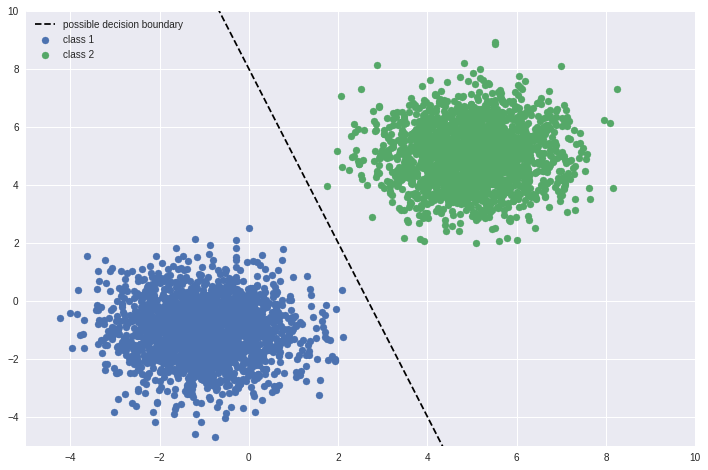

In [7]:
def plot_decision_boundary(w, b, x):
    # solve w_x * x + w_y*y + b = 0, for y
    plt.plot(x, (-b - w[0]*x)/w[1], 'k--')

plt.figure(figsize=(12,8))
plt.scatter(X[y == -1,0], X[y == -1,1], color=palette.as_hex()[0])
plt.scatter(X[y == 1,0], X[y == 1,1], color=palette.as_hex()[1])

w = [3, 1]
b = -8
plt.grid(True)
plot_decision_boundary(w, b, np.linspace(-5, 9))
plt.xlim([-5, 10])
plt.ylim([-5, 10])
plt.legend(['possible decision boundary', 'class 1', 'class 2'], loc='upper left')

---

# Non-linear decision boundary learned by kernelized SVM

In [8]:
def make_meshgrid(x, y, h=.2):
    """Create a mesh of points to plot in

    Parameters
    ----------
    x: data to base x-axis meshgrid on
    y: data to base y-axis meshgrid on
    h: stepsize for meshgrid, optional

    Returns
    -------
    xx, yy : ndarray
    """
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    return xx, yy


def plot_contours(clf, xx, yy, **params):
    """Plot the decision boundaries for a classifier.

    Parameters
    ----------
    clf: a classifier
    xx: meshgrid ndarray
    yy: meshgrid ndarray
    params: dictionary of params to pass to contourf, optional
    """
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = plt.contourf(xx, yy, Z, **params)
    return out

In [9]:
np.random.seed(42)
N = 200
X = np.concatenate(([1, 1] + np.random.randn(N, 2), [-1, -1] + np.random.randn(N, 2)))
y = np.concatenate((np.ones(N), -np.ones(N)))

X0, X1 = X[:, 0], X[:, 1]
xx, yy = make_meshgrid(X0, X1)

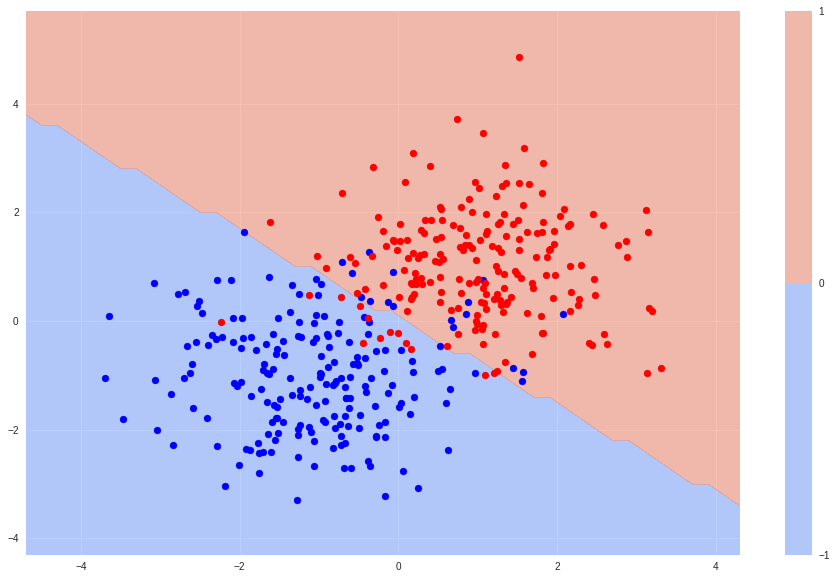

In [10]:
import sklearn.svm

clf = sklearn.svm.LinearSVC(C=1)
clf.fit(X, y)

plt.figure(figsize=(16,10))
plot_contours(clf, xx, yy, cmap=plt.cm.coolwarm, alpha=0.6, levels=[-1, 0, 1])
plt.colorbar()

plt.scatter(X[y == -1,0], X[y == -1,1], color='b', alpha=1)
plt.scatter(X[y == 1,0], X[y == 1,1], color='r', alpha=1)
plt.grid(True)

0.95 % of all training samples are SVs


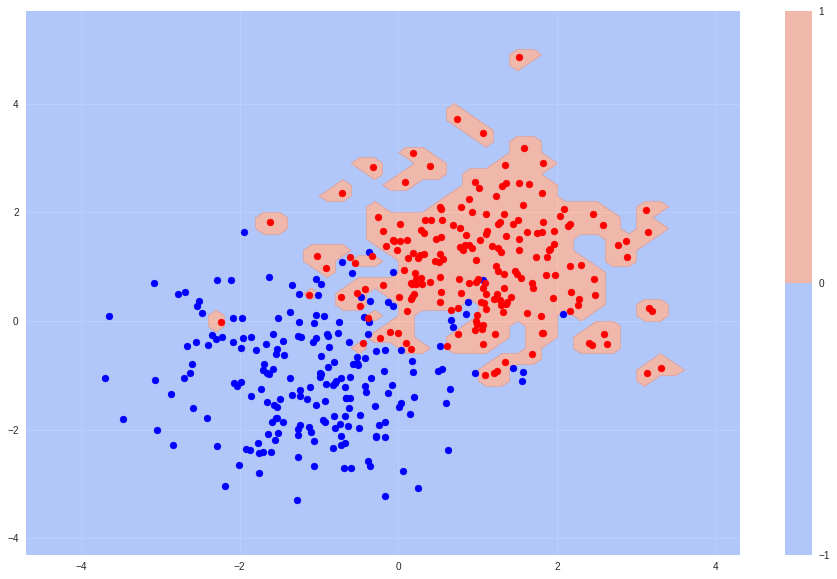

In [11]:
import sklearn.svm

clf = sklearn.svm.SVC(kernel='rbf', gamma=100.0)
clf.fit(X, y)
print 1.0*np.sum(clf.n_support_)/X.shape[0], '% of all training samples are SVs'

plt.figure(figsize=(16,10))
plot_contours(clf, xx, yy, cmap=plt.cm.coolwarm, alpha=0.6, levels=[-1, 0, 1])
plt.colorbar()

plt.scatter(X[y == -1,0], X[y == -1,1], color='b', alpha=1)
plt.scatter(X[y == 1,0], X[y == 1,1], color='r', alpha=1)
plt.grid(True)